Link to supporting video for below notebook walkhthrough - https://www.youtube.com/watch?v=RqhTzEVkfBQ


In [59]:
!pip install autoviml

In [60]:
!pip install shap

In [61]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd

In [62]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [64]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from xgboost.sklearn import XGBRegressor

In [65]:
train=pd.read_csv('train_micro_bussiness.csv')
test=pd.read_csv('test (1)_micro_bussiness.csv')
census=pd.read_csv('census_starter_micro_bussiness.csv')

In [66]:
final_train=train.merge(census,on='cfips')

In [67]:
final_test=test.merge(census,on='cfips')

In [68]:
df=final_train

In [69]:
df1=final_test

In [70]:
final_test.head()

,row_id,cfips,first_day_of_month,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,pct_foreign_born_2017,pct_foreign_born_2018,pct_foreign_born_2019,pct_foreign_born_2020,pct_foreign_born_2021,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2022-11-01,1001,2022-11-01,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00"
1,1001_2022-12-01,1001,2022-12-01,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00"
2,1001_2023-01-01,1001,2023-01-01,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00"
3,1001_2023-02-01,1001,2023-02-01,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00"
4,1001_2023-03-01,1001,2023-03-01,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00"


In [71]:
df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,pct_foreign_born_2017,pct_foreign_born_2018,pct_foreign_born_2019,pct_foreign_born_2020,pct_foreign_born_2021,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.01,1249,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00"
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.88,1198,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00"
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.06,1269,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00"
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.99,1243,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00"
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.99,1243,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00"


In [72]:
y=df.iloc[:,5]

In [73]:
y.head()

0   3.01
1   2.88
2   3.06
3   2.99
4   2.99
Name: microbusiness_density, dtype: float64

In [74]:
#df.drop('county',axis=1,inplace=True)

In [75]:
df['year']=df['first_day_of_month'].apply(lambda x:x.split('-')[0])

In [76]:
df['month']=df['first_day_of_month'].apply(lambda x:x.split('-')[1])

In [77]:
df['day']=df['first_day_of_month'].apply(lambda x:x.split('-')[2])

In [78]:
df1['year']=df1['first_day_of_month'].apply(lambda x:x.split('-')[0])
df1['month']=df1['first_day_of_month'].apply(lambda x:x.split('-')[1])
df1['day']=df1['first_day_of_month'].apply(lambda x:x.split('-')[2])

In [79]:
#df.drop('state',axis=1,inplace=True)

In [80]:
df.drop('row_id',axis=1,inplace=True)

In [81]:
df1.drop('row_id',axis=1,inplace=True)

In [82]:
#df.drop('cfips',axis=1,inplace=True)

In [83]:
df.drop('first_day_of_month',axis=1,inplace=True)

In [84]:
df1.drop('first_day_of_month',axis=1,inplace=True)

In [85]:
df.drop('active',axis=1,inplace=True)

In [86]:
df.head()

,cfips,county,state,microbusiness_density,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,pct_foreign_born_2017,pct_foreign_born_2018,pct_foreign_born_2019,pct_foreign_born_2020,pct_foreign_born_2021,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,year,month,day
0,1001,Autauga County,Alabama,3.01,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00",2019,08,01
1,1001,Autauga County,Alabama,2.88,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00",2019,09,01
2,1001,Autauga County,Alabama,3.06,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00",2019,10,01
3,1001,Autauga County,Alabama,2.99,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00",2019,11,01
4,1001,Autauga County,Alabama,2.99,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00",2019,12,01


In [87]:
df.shape

(122265, 32)

In [88]:
df1.shape

(25080, 29)

In [89]:
df1.head()

,cfips,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,pct_foreign_born_2017,pct_foreign_born_2018,pct_foreign_born_2019,pct_foreign_born_2020,pct_foreign_born_2021,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,year,month,day
0,1001,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00",2022,11,01
1,1001,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00",2022,12,01
2,1001,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00",2023,01,01
3,1001,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00",2023,02,01
4,1001,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00",2023,03,01


In [90]:
df.head()

,cfips,county,state,microbusiness_density,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,pct_foreign_born_2017,pct_foreign_born_2018,pct_foreign_born_2019,pct_foreign_born_2020,pct_foreign_born_2021,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,year,month,day
0,1001,Autauga County,Alabama,3.01,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00",2019,08,01
1,1001,Autauga County,Alabama,2.88,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00",2019,09,01
2,1001,Autauga County,Alabama,3.06,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00",2019,10,01
3,1001,Autauga County,Alabama,2.99,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00",2019,11,01
4,1001,Autauga County,Alabama,2.99,76.60,78.90,80.60,82.70,85.50,14.50,15.90,16.10,16.70,16.40,2.10,2.00,2.30,2.30,2.10,1.30,1.10,0.70,0.60,1.10,55317,"58,786.00",58731,"57,982.00","62,660.00",2019,12,01


In [91]:
#train_df,test_df=train_test_split(df,test_size=0.3,random_state=1234)

In [92]:
#train_df.head()

In [93]:
target='microbusiness_density'

In [94]:
#train_df.shape

In [95]:
#test_df.shape

In [96]:
#train_df.info()

In [97]:
from autoviml.Auto_ViML import Auto_ViML

In [98]:
target

'microbusiness_density'

##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (122265, 32)
    Training Set Memory Usage = 30.78 MB
Test Set Shape = (25080, 29)
    Test Set Memory Usage = 5.74 MB
Single_Label Target: ['microbusiness_density']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  23
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Co

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

Auto NLP processing on NLP Column: county
Shape of Train Data: 122265 rows
    Shape of Test Data: 25080 rows
    Added 9 summary columns for counts of words and characters in each row
Cleaning text in county column. Please be patient since this is a large dataset with >100K rows...
    Faster text processing using clean_tweets function, since top_num_features exceeds 300
Train data Text cleaning completed. Time taken = 45 seconds
##################    THIS IS FOR BUILD_MODEL = FALSE           #################
Building Model and Pipeline for NLP column = county. This will take time...
    Selected the maximum number of features limit = 3996
Performing RandomizedSearchCV across 30 params. Optimizing for neg_mean_squared_error
    Using train data = (97812,) and Cross Validation data = (24453,)
Since top_num_features = 300, selecting LightGBM Regressor model. If you need different model, decrease it <300.
Training completed. Time taken for training = 5.4 minutes
Best Params of NLP pipel

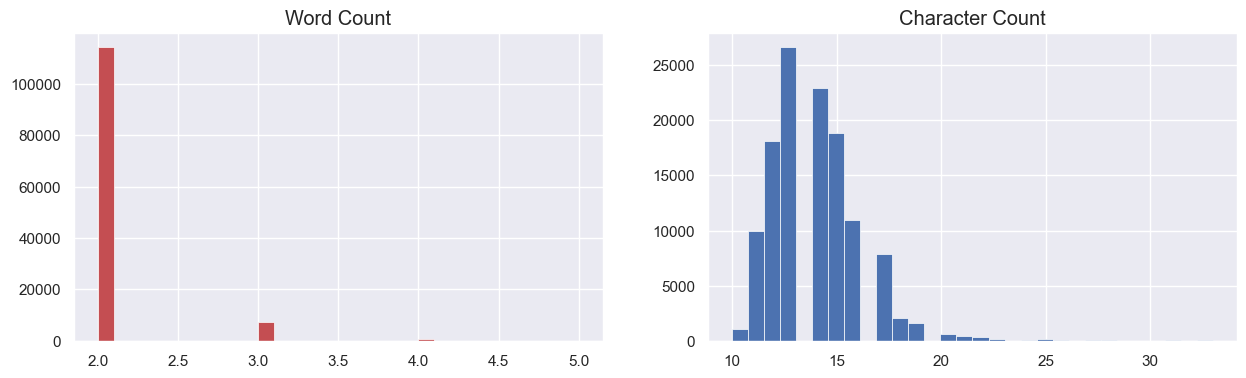

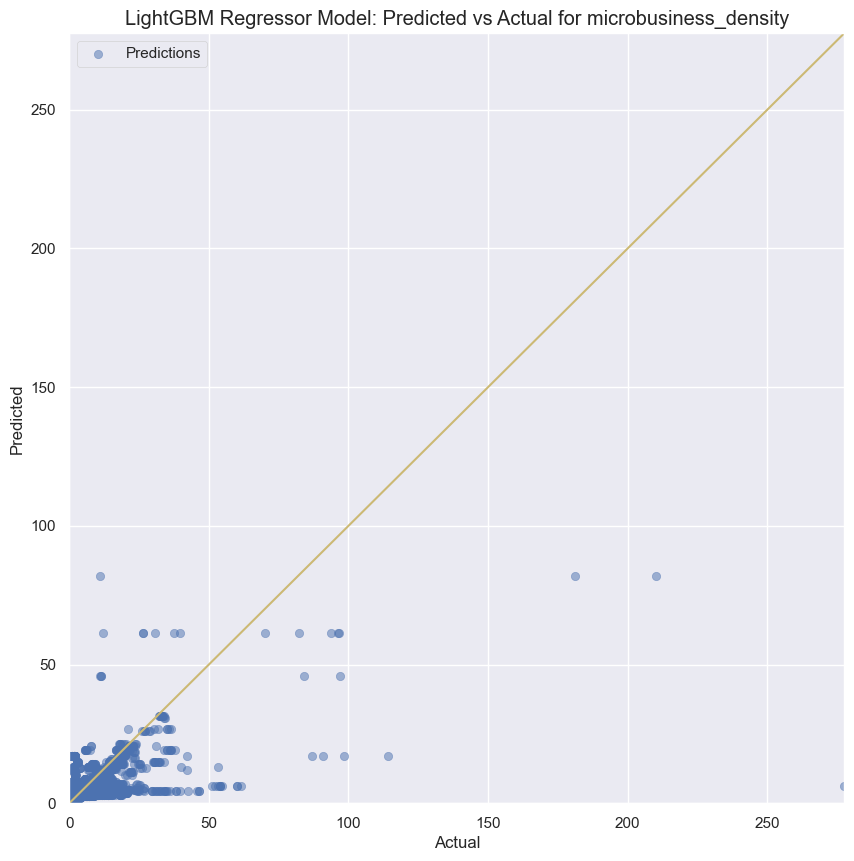

    MAE = 1.6611
    MAPE = inf%
    RMSE = 3.6943
    MAE as % std dev of Actuals = 34.2%
    Normalized RMSE (% of MinMax of Actuals) = 1%
    Normalized RMSE (% of Std Dev of Actuals) = 76%
  Now transforming Train data to return as output...
  Transforming Test data to return as output...
Auto_NLP error. Continuing without NLP processing
#######################################################################################
#####  SULOV:  Searching for Uncorrelated List Of Variables in 23 features ############
#######################################################################################
    there are no null values in dataset...
    Removing (18) highly correlated variables:
    ['pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021', 'pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2021', 'pct_it_workers_2018', 'pct_it_worker

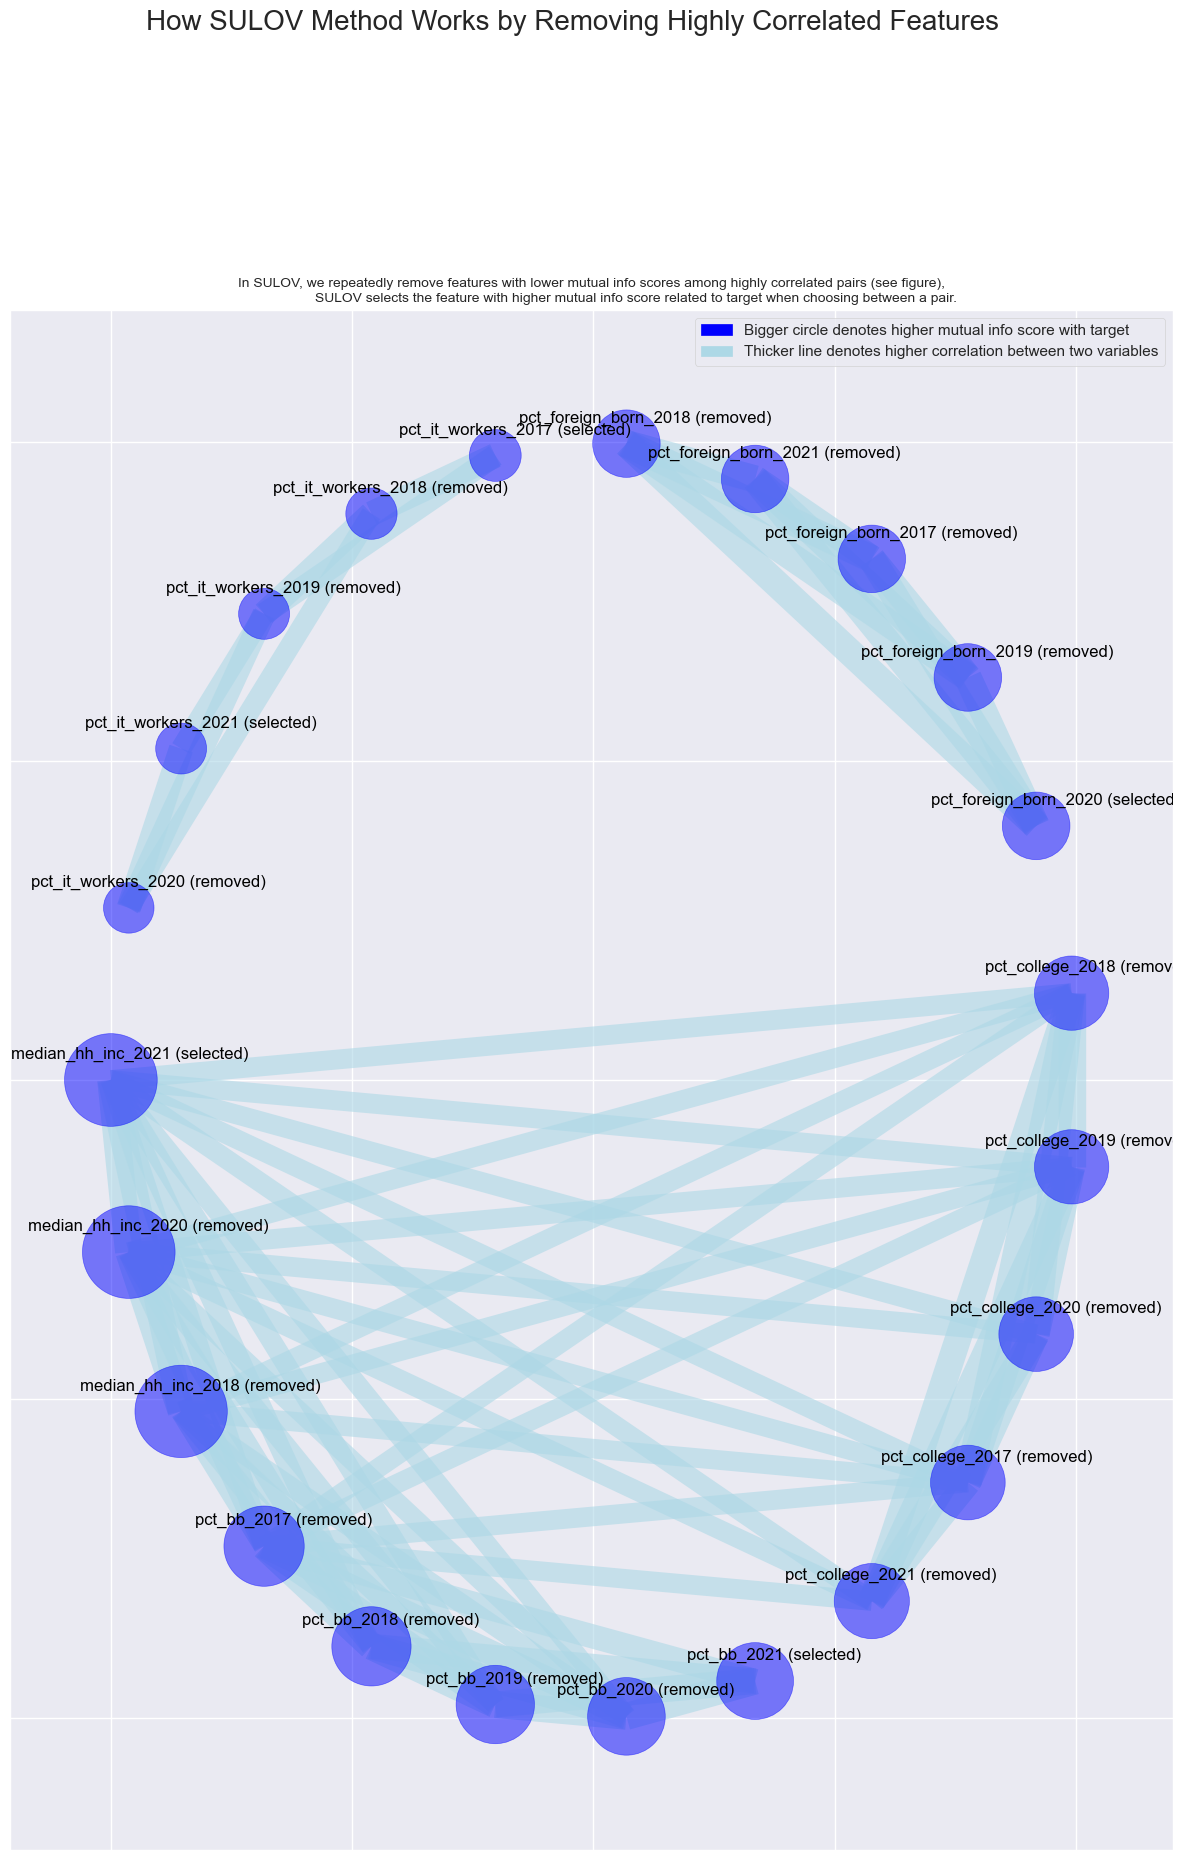

Splitting selected features into float and categorical (integer) variables:
    (5) float variables ...
    (10) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 15 
    Finding Important Features using Boosted Trees algorithm...
        using 15 variables...
Finding top features using XGB is crashing. Continuing with all predictors...
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  97812 , CV rows =  24453
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Alert! Stacking can produce Highly Overfit models on Training Data...
    Error in Stacking 

ValueError: could not convert string to float: 'Tennessee'

In [99]:
model, features, trainm, testm = Auto_ViML(df, target, df1, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag=False,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=True,
                                    Imbalanced_Flag=False, 
                                    verbose=1)

In [47]:
pd.read_csv('.\microbusiness_density\microbusiness_density_Regression_train_modified.csv')

,year,pct_bb_2021,pct_foreign_born_2020,median_hh_inc_2017,pct_it_workers_2021,cfips,pct_it_workers_2017,median_hh_inc_2019,median_hh_inc_2021,month,microbusiness_density,LassoCV Regularization_0
0,0,85.50,2.30,55317,1.10,1001,1.30,58731,"62,660.00",7,3.01,4.11
1,0,85.50,2.30,55317,1.10,1001,1.30,58731,"62,660.00",8,2.88,4.10
2,0,85.50,2.30,55317,1.10,1001,1.30,58731,"62,660.00",9,3.06,4.14
3,0,85.50,2.30,55317,1.10,1001,1.30,58731,"62,660.00",10,2.99,4.09
4,0,85.50,2.30,55317,1.10,1001,1.30,58731,"62,660.00",11,2.99,4.14
...,...,...,...,...,...,...,...,...,...,...,...,...
122260,3,81.30,2.30,59605,0.00,56045,0.60,57031,"65,566.00",5,1.80,2.92
122261,3,81.30,2.30,59605,0.00,56045,0.60,57031,"65,566.00",6,1.80,2.92
122262,3,81.30,2.30,59605,0.00,56045,0.60,57031,"65,566.00",7,1.79,2.95
122263,3,81.30,2.30,59605,0.00,56045,0.60,57031,"65,566.00",8,1.79,2.95


In [48]:
pd.read_csv('.\microbusiness_density\microbusiness_density_Regression_test_modified.csv')

,year,pct_bb_2021,pct_foreign_born_2020,median_hh_inc_2017,pct_it_workers_2021,cfips,pct_it_workers_2017,median_hh_inc_2019,median_hh_inc_2021,month,LassoCV Regularization_0,microbusiness_density_Stacked_LassoCV Regularization_predictions,microbusiness_density_predictions
0,1.00,0.80,0.04,0.33,0.07,0.00,0.07,0.31,0.33,0.91,0.38,4.42,4.01
1,1.00,0.80,0.04,0.33,0.07,0.00,0.07,0.31,0.33,1.00,0.38,4.43,4.02
2,1.33,0.80,0.04,0.33,0.07,0.00,0.07,0.31,0.33,0.00,0.38,4.39,3.98
3,1.33,0.80,0.04,0.33,0.07,0.00,0.07,0.31,0.33,0.09,0.38,4.41,3.99
4,1.33,0.80,0.04,0.33,0.07,0.00,0.07,0.31,0.33,0.18,0.38,4.42,4.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25075,1.33,0.73,0.04,0.37,0.00,1.00,0.03,0.29,0.35,0.09,0.31,2.98,2.88
25076,1.33,0.73,0.04,0.37,0.00,1.00,0.03,0.29,0.35,0.18,0.31,2.99,2.88
25077,1.33,0.73,0.04,0.37,0.00,1.00,0.03,0.29,0.35,0.27,0.32,3.00,2.89
25078,1.33,0.73,0.04,0.37,0.00,1.00,0.03,0.29,0.35,0.36,0.32,3.02,2.89


In [49]:
pred=pd.read_csv('.\microbusiness_density\microbusiness_density_Regression_submission.csv')

In [50]:
pred.head()

,microbusiness_density
0,4.01
1,4.02
2,3.98
3,3.99
4,4.01


hyper_param: Tuning options are GridSearch ('GS') and RandomizedSearch ('RS'). Default is 'GS'.

feature_reduction: Default = 'True' but it can be set to False if you don't want automatic    

Boosting Flag: you have 4 possible choices (default is False):                               
  None = This will build a Linear Model                                                  
  False = This will build a Random Forest or Extra Trees model (also known as Bagging)        
  True = This will build an XGBoost model                                                     
  CatBoost = THis will build a CatBoost model (provided you have CatBoost installed)          



In [51]:
model

RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=3,
                      n_estimators=354, n_jobs=-1, random_state=99,
                      warm_start=True)

In [52]:
sample=pd.read_csv('sample_submission (1)_micro_bussiness.csv')

In [53]:
sample.head()

,row_id,microbusiness_density
0,1001_2022-11-01,3.82
1,1003_2022-11-01,3.82
2,1005_2022-11-01,3.82
3,1007_2022-11-01,3.82
4,1009_2022-11-01,3.82


In [54]:
sample.drop('microbusiness_density',axis=1,inplace=True)

In [55]:
sample

,row_id
0,1001_2022-11-01
1,1003_2022-11-01
2,1005_2022-11-01
3,1007_2022-11-01
4,1009_2022-11-01
...,...
25075,56037_2023-06-01
25076,56039_2023-06-01
25077,56041_2023-06-01
25078,56043_2023-06-01


In [56]:
predictions=sample.join(pred)

In [57]:
predictions.head()

,row_id,microbusiness_density
0,1001_2022-11-01,4.01
1,1003_2022-11-01,4.02
2,1005_2022-11-01,3.98
3,1007_2022-11-01,3.99
4,1009_2022-11-01,4.01


In [58]:
predictions.to_csv('.\\micro_bussiness_predections_8.csv',index=None)

In [175]:
features

['active',
 'pct_it_workers_2021',
 'pct_bb_2021',
 'pct_it_workers_2017',
 'cfips',
 'pct_foreign_born_2019',
 'median_hh_inc_2021',
 'median_hh_inc_2019',
 'median_hh_inc_2017',
 'median_hh_inc_2020_Missing_Flag',
 'median_hh_inc_2021_Missing_Flag']

In [33]:
trainm.head()

,year,pct_bb_2021,month,pct_foreign_born_2019,median_hh_inc_2019,pct_it_workers_2017,state,median_hh_inc_2021,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2020_Missing_Flag,median_hh_inc_2021_Missing_Flag,pct_it_workers_2018_Missing_Flag,median_hh_inc_2018_Missing_Flag,microbusiness_density,LassoCV Regularization_0
65850,2,81.80,1,3.50,64053,0.70,27,"69,886.00",0.60,61769,0,0,0,0,1.51,3.91
86332,2,91.30,8,4.60,67043,3.20,37,"74,082.00",1.60,59152,0,0,0,0,12.47,6.63
23756,1,85.30,0,1.70,49779,1.00,13,"54,942.00",0.90,47468,0,0,0,0,2.22,3.26
67789,1,76.20,2,1.40,55324,1.80,27,"58,015.00",1.70,50270,0,0,0,0,2.29,3.33
83839,2,83.00,11,2.50,52428,0.30,36,"53,672.00",0.70,52930,0,0,0,0,2.60,2.51


In [36]:
testm.head().shape

(5, 17)

In [43]:
testm_tatget=testm[['microbusiness_density'],index=True]

SyntaxError: invalid syntax (2337874264.py, line 1)

In [38]:
model.fit(testm,y)

ValueError: Found input variables with inconsistent numbers of samples: [36680, 122265]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [96]:
testm

NameError: name 'testm' is not defined

In [ ]:
 print(confusion_matrix(test_df[target].values,testm['Churn_XGBoost_predictions'].values))

[[1408  125]
 [ 307  273]]


In [ ]:
 print(confusion_matrix(test_df[target].values,testm['Churn_Logistic Regression_predictions'].values))

[[1405  128]
 [ 299  281]]


In [ ]:
 print(confusion_matrix(test_df[target].values,testm['Churn_Ensembled_predictions'].values))

[[1376  157]
 [ 278  302]]


In [ ]:
print(classification_report(test_df[target].values,testm['Churn_XGBoost_predictions'].values))

              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1533
         Yes       0.69      0.47      0.56       580

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



In [ ]:
print(classification_report(test_df[target].values,testm['Churn_Ensembled_predictions'].values))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1533
         Yes       0.66      0.52      0.58       580

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113

